In [ ]:
pip install geopandas matplotlib


In [ ]:
pip install descartes  # For plotting polygons in matplotlib


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.collections as mplc
import libpysal as ps
from shapely import geometry as sgeom
import descartes as des
import pointpats
%matplotlib inline

In [ ]:
import requests
import geopandas as gpd

def retrieve_data_from_service(url, parameters):
    # Send an HTTP GET request to the specified URL with given parameters
    result = requests.get(url, params=parameters)
    if result.status_code == 200:
        # Convert the JSON response into a Python dictionary
        data = result.json()
        return data
    else:
        # Output an error message if something went wrong
        print("Error occurred during data retrieval:", result.text)
        return None


In [ ]:
# Establish the API endpoint for the Robbery Open Data service
data_service_url = "https://services.arcgis.com/S9th0jAJ7bqgIRjw/ArcGIS/rest/services/Robbery_Open_Data/FeatureServer/0/query"

# Set up the query parameters for the API request
api_query_parameters = {
    "where": "(OCC_DATE>=TIMESTAMP '2013-01-01 00:00:00')",
    "outFields": "*",
    "outSR": "4326",
    "f": "geojson"
}


In [ ]:
# Retrieve data using the feature service endpoint and parameters for robbery data
robbery_data = retrieve_data_from_service(data_service_url, api_query_parameters)


In [ ]:
# Construct a GeoDataFrame using the GeoJSON features from the robbery data
robbery_geo_df = gpd.GeoDataFrame.from_features(robbery_data['features'])
# Ensure the GeoDataFrame has the correct CRS set if not already specified
if robbery_geo_df.crs is None:
    robbery_geo_df.set_crs(epsg=4326, inplace=True)
robbery_geo_df


,geometry,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,POINT (-79.51619 43.70015),1,GO-20141262644,1388552400000,1388552400000,2014,January,1,1,Wednesday,...,1610,150,Robbery - Purse Snatch,Robbery,113,Weston,113,Weston (113),-79.516192,43.700155
1,POINT (-79.40198 43.64760),2,GO-20141260912,1388552400000,1388552400000,2014,January,1,1,Wednesday,...,1610,100,Robbery With Weapon,Robbery,164,Wellington Place,78,Kensington-Chinatown (78),-79.401983,43.647598
2,POINT (-79.38414 43.66390),3,GO-20141262818,1388552400000,1388552400000,2014,January,1,1,Wednesday,...,1610,210,Robbery - Business,Robbery,167,Church-Wellesley,75,Church-Yonge Corridor (75),-79.384137,43.663899
3,POINT (0.00000 0.00000),4,GO-20141260577,1388552400000,1388552400000,2014,January,1,1,Wednesday,...,1610,180,Robbery - Swarming,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
4,POINT (0.00000 0.00000),5,GO-20141260577,1388552400000,1388552400000,2014,January,1,1,Wednesday,...,1610,200,Robbery - Mugging,Robbery,NSA,NSA,NSA,NSA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,POINT (-79.28093 43.71202),1997,GO-20142489104,1405224000000,1405224000000,2014,July,13,194,Sunday,...,1610,200,Robbery - Mugging,Robbery,120,Clairlea-Birchmount,120,Clairlea-Birchmount (120),-79.280932,43.712017
1996,POINT (-79.29019 43.69338),1998,GO-20142489072,1405224000000,1405224000000,2014,July,13,194,Sunday,...,1610,220,Robbery - Other,Robbery,121,Oakridge,121,Oakridge (121),-79.290192,43.693384
1997,POINT (-79.22448 43.73181),1999,GO-20142486981,1405224000000,1405224000000,2014,July,13,194,Sunday,...,1610,100,Robbery With Weapon,Robbery,139,Scarborough Village,139,Scarborough Village (139),-79.224482,43.731806
1998,POINT (-79.28151 43.78475),2000,GO-20142486357,1405224000000,1405224000000,2014,July,13,194,Sunday,...,1610,220,Robbery - Other,Robbery,128,Agincourt South-Malvern West,128,Agincourt South-Malvern West (128),-79.281506,43.784746


In [ ]:
robbery_geo_df["OFFENCE"].unique()


array(['Robbery - Purse Snatch', 'Robbery With Weapon',
       'Robbery - Business', 'Robbery - Swarming', 'Robbery - Mugging',
       'Robbery - Other', 'Robbery - Financial Institute',
       'Robbery - Armoured Car', 'Robbery - Vehicle Jacking',
       'Robbery - Home Invasion', 'Robbery - Taxi',
       'Robbery - Delivery Person', 'Robbery - Atm'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt
geo_df_neighborhoods = gpd.read_file("sample_data/Neighbourhoods.geojson")
geo_df_neighborhoods


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,CLASSIFICATION,CLASSIFICATION_CODE,OBJECTID,geometry
0,1,2502366,26022881,0,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,NA,17824737.0,"MULTIPOLYGON (((-79.38635 43.69783, -79.38623 ..."
1,2,2502365,26022880,0,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,NA,17824753.0,"MULTIPOLYGON (((-79.39744 43.70693, -79.39837 ..."
2,3,2502364,26022879,0,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,NA,17824769.0,"MULTIPOLYGON (((-79.43411 43.66015, -79.43537 ..."
3,4,2502363,26022878,0,171,171,Junction-Wallace Emerson,Junction-Wallace Emerson (171),Not an NIA or Emerging Neighbourhood,NA,17824785.0,"MULTIPOLYGON (((-79.43870 43.66766, -79.43841 ..."
4,5,2502362,26022877,0,170,170,Yonge-Bay Corridor,Yonge-Bay Corridor (170),Not an NIA or Emerging Neighbourhood,NA,17824801.0,"MULTIPOLYGON (((-79.38404 43.64497, -79.38502 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,2502213,26022728,0,001,001,West Humber-Clairville,West Humber-Clairville (1),Not an NIA or Emerging Neighbourhood,NA,17827185.0,"MULTIPOLYGON (((-79.59037 43.73401, -79.58942 ..."
154,155,2502212,26022727,0,024,024,Black Creek,Black Creek (24),Neighbourhood Improvement Area,NIA,17827201.0,"MULTIPOLYGON (((-79.51915 43.77399, -79.51901 ..."
155,156,2502211,26022726,0,023,023,Pelmo Park-Humberlea,Pelmo Park-Humberlea (23),Not an NIA or Emerging Neighbourhood,NA,17827217.0,"MULTIPOLYGON (((-79.53225 43.73505, -79.52938 ..."
156,157,2502210,26022725,0,022,022,Humbermede,Humbermede (22),Neighbourhood Improvement Area,NIA,17827233.0,"MULTIPOLYGON (((-79.52813 43.74425, -79.52721 ..."


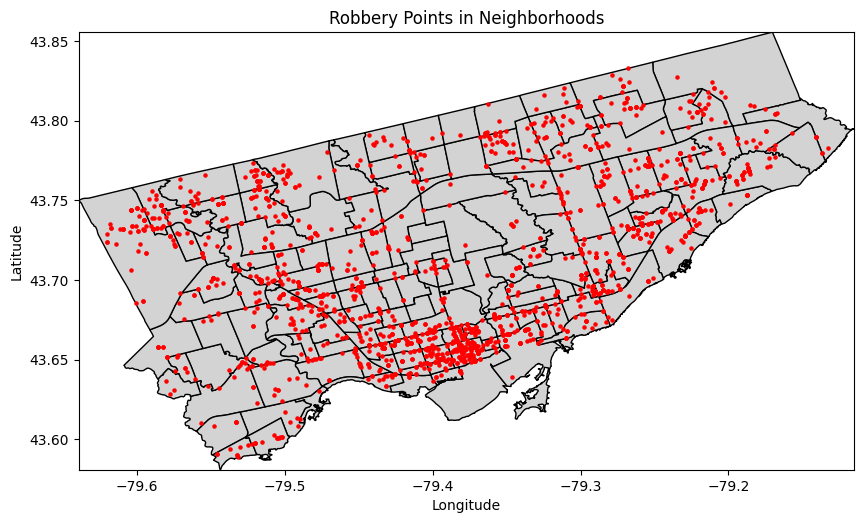

In [ ]:
# Ensure CRS match
robbery_geo_df = robbery_geo_df.to_crs(geo_df_neighborhoods.crs)

# Plot neighborhood map with specified dimensions and color scheme
ax = geo_df_neighborhoods.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Overlay robbery points on the neighborhood map
robbery_geo_df.plot(ax=ax, color='red', markersize=5)

# Set the x and y limits to the range of your neighborhood data
ax.set_xlim(geo_df_neighborhoods.total_bounds[[0, 2]])
ax.set_ylim(geo_df_neighborhoods.total_bounds[[1, 3]])

# Configure the axis labels and plot title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Robbery Points in Neighborhoods')

# Display the plot
plt.show()


In [ ]:
pip install pointpats


In [ ]:
# Import necessary functions for centrography analysis
from pointpats.centrography import (hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance, euclidean_median, ellipse)
import numpy as np


In [ ]:
# Extracting point coordinates from the GeoDataFrame for robbery locations
robbery_points = robbery_geo_df[['LONG_WGS84', 'LAT_WGS84']].values


In [ ]:
# Calculate the mean center of robbery locations
mean_center = mean_center(robbery_points)


In [ ]:
# Calculate the Manhattan median of robbery locations
manhattan_median = manhattan_median(robbery_points)


/usr/local/lib/python3.10/dist-packages/pointpats/centrography.py:208: UserWarning: Manhattan Median is not unique for even point patterns.
  warnings.warn(s)


In [ ]:
# Calculate the Euclidean median of robbery locations
euclidean_median = euclidean_median(robbery_points)


In [ ]:
print("Mean Center coordinates:", mean_center)


Mean Center coordinates: [-76.49090276  42.11424879]


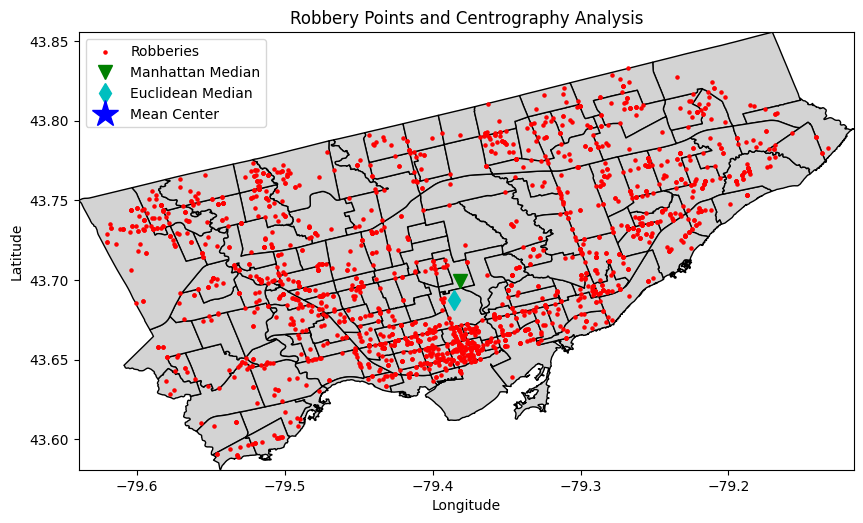

In [ ]:
# Plot neighborhood map with specified dimensions and color scheme
# Plot neighborhood map
ax = geo_df_neighborhoods.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot robbery points
robbery_geo_df.plot(ax=ax, color='red', markersize=5, label='Robberies')

# Set plot limits to match the neighborhoods' extents
ax.set_xlim(geo_df_neighborhoods.total_bounds[[0, 2]])
ax.set_ylim(geo_df_neighborhoods.total_bounds[[1, 3]])

# Plot centrography measures
plt.plot(manhattan_median[0], manhattan_median[1], 'gv', markersize=10, label='Manhattan Median')  # Green triangle for Manhattan Median
plt.plot(euclidean_median[0], euclidean_median[1], 'cd', markersize=10, label='Euclidean Median')  # Cyan diamond for Euclidean Median

# Plot the mean center with a clearly visible marker
plt.plot(mean_center[0], mean_center[1], 'b*', markersize=20, label='Mean Center')  # Large blue star for Mean Center

# Configure the axis labels and plot title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Robbery Points and Centrography Analysis')

# Display a legend to identify the markers
plt.legend()

# Show the plot on screen
plt.show()



Chi-squared test statistic: 843.173845355475
Degrees of freedom: 8
Analytical p-value: 1.0156172187055388e-176


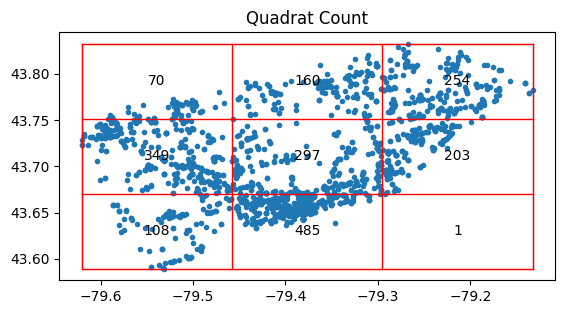

In [ ]:
import matplotlib.pyplot as plt
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs

# Assuming robbery_geo_df has the correct CRS and contains the robbery points
# Filter points based on the specified coordinate limits for Toronto
filtered_robbery_points = [(x, y) for x, y in zip(robbery_geo_df['LONG_WGS84'], robbery_geo_df['LAT_WGS84'])
                           if -79.7 <= x <= -79.1 and 43.5 <= y <= 43.9]

# Create PointPattern from filtered robbery data
pp_robbery = PointPattern(filtered_robbery_points)

# Perform rectangle quadrat analysis
q_r = qs.QStatistic(pp_robbery, shape="rectangle", nx=3, ny=3)

q_r.plot()  # Plot the quadrats and point counts

print(f"Chi-squared test statistic: {q_r.chi2}")
print(f"Degrees of freedom: {q_r.df}")
print(f"Analytical p-value: {q_r.chi2_pvalue}")




Chi-squared test statistic: 3285.9148936170213
Degrees of freedom: 20
Analytical p-value: 0.0


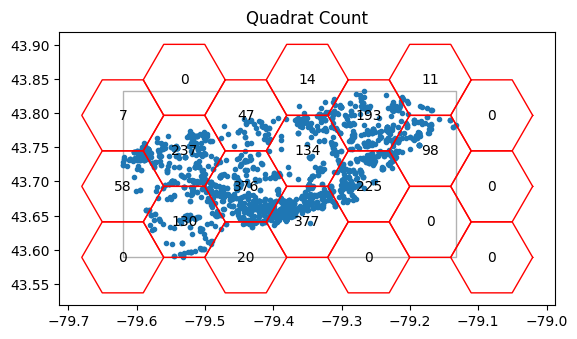

In [ ]:
import matplotlib.pyplot as plt
from pointpats import PointPattern
import pointpats.quadrat_statistics as qs

# Assuming robbery_geo_df has the correct CRS and contains the robbery points
# Filter points based on the specified coordinate limits for Toronto
filtered_robbery_points = [(x, y) for x, y in zip(robbery_geo_df['LONG_WGS84'], robbery_geo_df['LAT_WGS84'])
                           if -79.7 <= x <= -79.1 and 43.5 <= y <= 43.9]

# Create PointPattern from filtered robbery data
pp_robbery = PointPattern(filtered_robbery_points)

# Perform hexagon quadrat analysis with the edge length adjusted for your study area


# Perform hexagon quadrat analysis
q_h = qs.QStatistic(pp_robbery, shape="hexagon", lh=0.06)  # lh is the hexagon edge length
q_h.plot()  # Plot the quadrats and point counts

print(f"Chi-squared test statistic: {q_h.chi2}")
print(f"Degrees of freedom: {q_h.df}")
print(f"Analytical p-value: {q_h.chi2_pvalue}")
# Plot the robbery points


In [ ]:
# Count occurrences of each robbery type
robbery_counts = robbery_geo_df.groupby(['OFFENCE'])['OFFENCE'].count()
robbery_counts


OFFENCE
Robbery - Armoured Car             9
Robbery - Atm                      7
Robbery - Business               128
Robbery - Delivery Person         13
Robbery - Financial Institute     68
Robbery - Home Invasion           75
Robbery - Mugging                730
Robbery - Other                  344
Robbery - Purse Snatch           104
Robbery - Swarming               208
Robbery - Taxi                    21
Robbery - Vehicle Jacking         12
Robbery With Weapon              281
Name: OFFENCE, dtype: int64

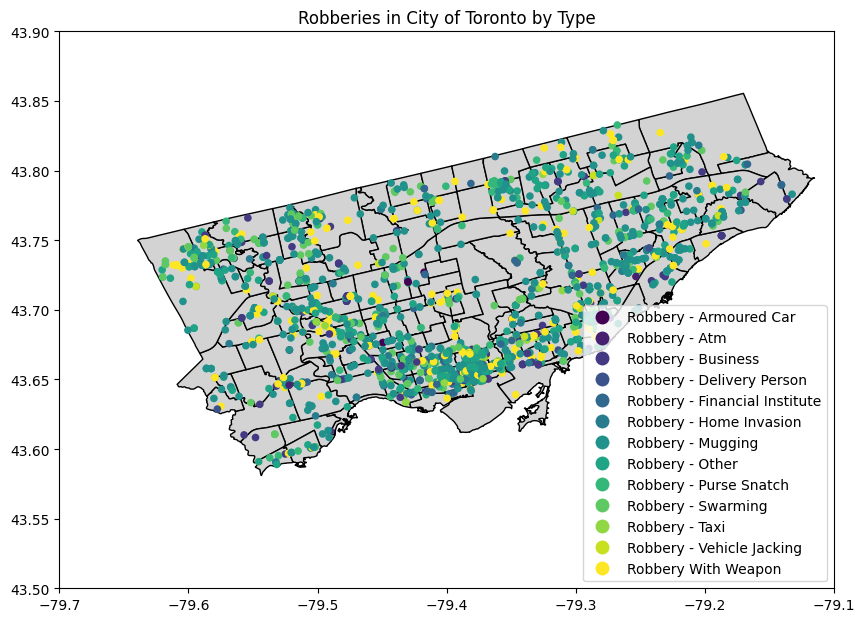

In [ ]:
# Plot the neighborhood background
ax = geo_df_neighborhoods.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Overlay robbery data, categorized by the type of offence
robbery_geo_df.plot(ax=ax, markersize=20, zorder=2, column="OFFENCE", legend=True, cmap='viridis')

# Set the title of the plot
plt.title('Robberies in City of Toronto by Type')

# Set the x and y axis limits to the specified geographic bounds
ax.set_xlim(-79.7, -79.1)
ax.set_ylim(43.5, 43.9)

# Display the plot
plt.show()


In [ ]:
# Assuming 'robbery_geo_df' is your main GeoDataFrame containing all robbery data
# with a column named 'OFFENCE' that describes the type of offense.

# Filter the robbery data for each offense type as per the provided image
armoured_car_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Armoured Car']
atm_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Atm']
business_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Business']
delivery_person_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Delivery Person']
financial_institute_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Financial Institute']
home_invasion_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Home Invasion']
mugging_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Mugging']
other_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Other']
purse_snatch_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Purse Snatch']
swarming_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Swarming']
taxi_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Taxi']
vehicle_jacking_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery - Vehicle Jacking']
weapon_robbery_gdf = robbery_geo_df[robbery_geo_df['OFFENCE'] == 'Robbery With Weapon']



In [ ]:
import numpy as np
from scipy.stats import gaussian_kde

# Function to perform KDE and plot results with neighborhoods in the background
def plot_kde(crime_gdf, gdf_neigh, ax, title, color):
    # Check if there are data points to plot
    if crime_gdf.empty or crime_gdf.geometry.is_empty.any():
        ax.text(0.5, 0.5, 'No data to plot', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(title)
        return

    # Extract the x and y coordinates of the points
    x = crime_gdf.geometry.x
    y = crime_gdf.geometry.y

    # Set the bounds specifically to the Toronto area
    xmin, xmax, ymin, ymax = -79.7, -79.1, 43.5, 43.9

    # Creating a grid of points where we want to evaluate the KDE
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]  # 100j specifies 100 x 100 grid

    # Perform the kernel density estimate
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = gaussian_kde(values, bw_method='silverman')
    f = np.reshape(kernel(positions).T, xx.shape)

    # Plot the neighborhoods as a background
    gdf_neigh.plot(ax=ax, color='lightgrey', edgecolor='black')

    # Plot the results: contour map
    ax.contourf(xx, yy, f, levels=15, cmap=color, alpha=0.7)  # setting alpha to make neighborhoods visible
    ax.set_title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

# Usage example
# fig, ax = plt.subplots(figsize=(10, 10))
# plot_kde(weapon_robbery_gdf, geo_df_neighborhoods, ax, 'Robbery with Weapon KDE', 'Oranges')
# plt.show()





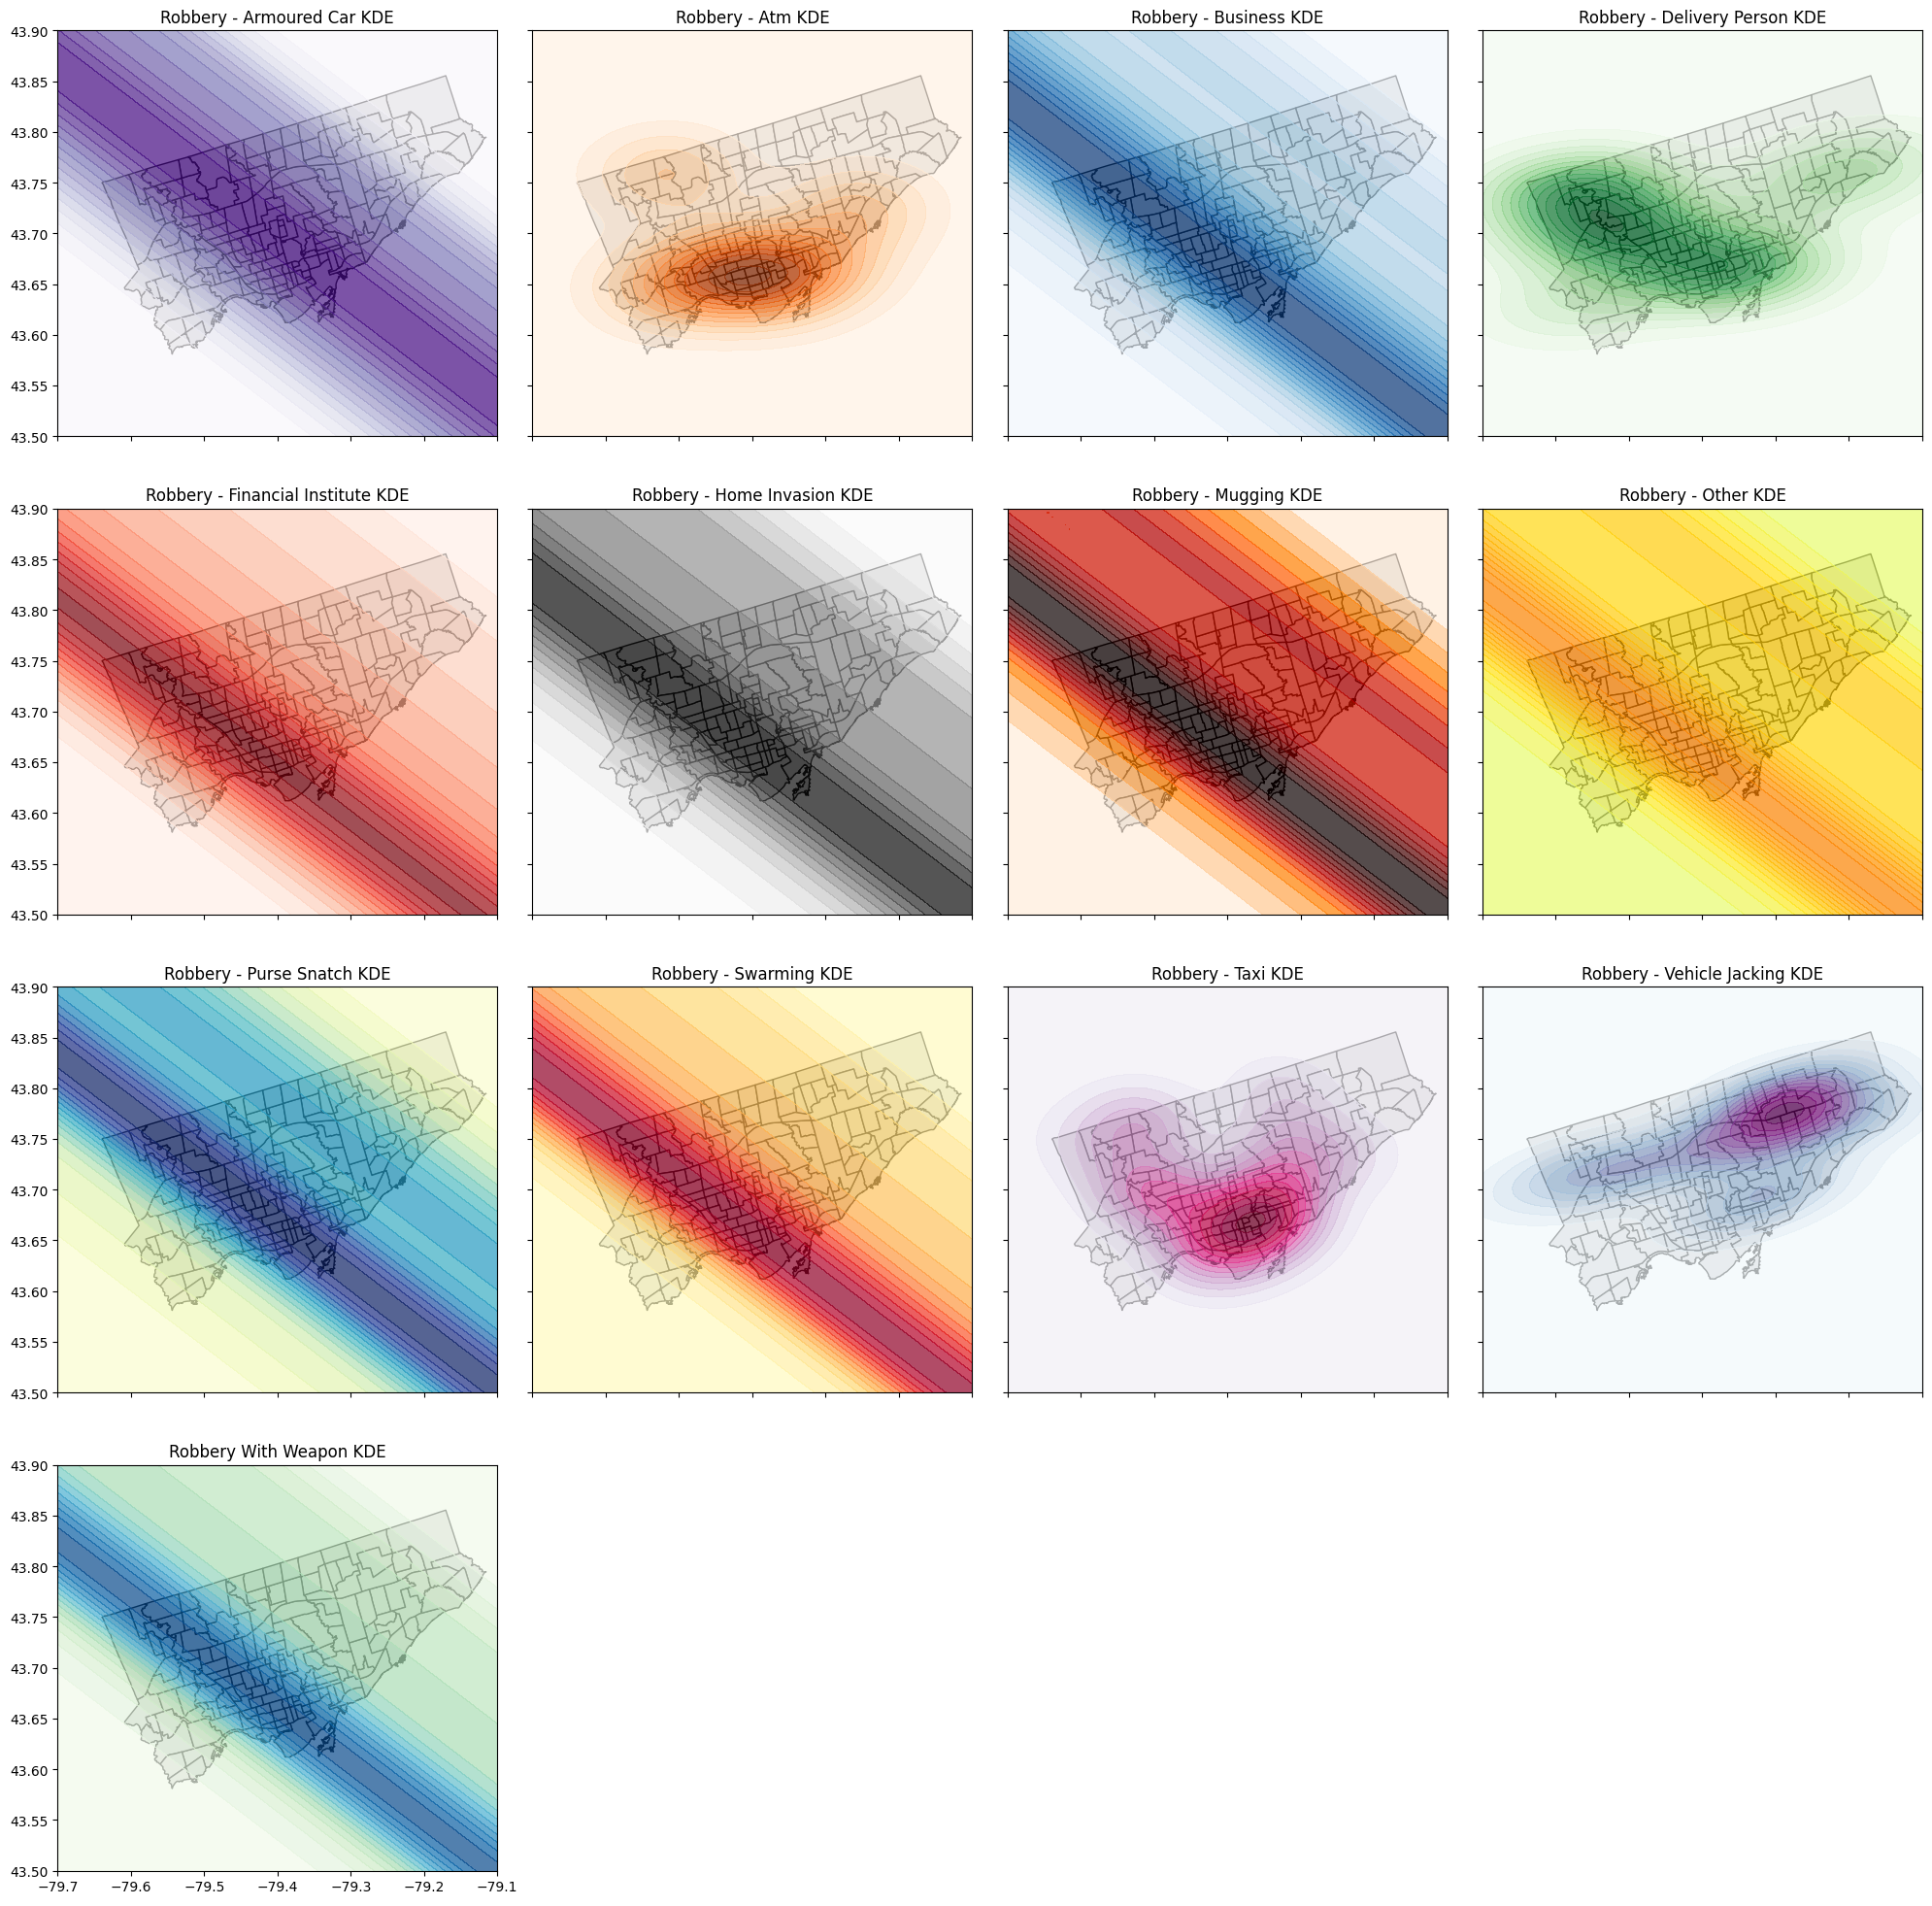

In [ ]:
import matplotlib.pyplot as plt

# Function definitions would remain the same as previously provided

# Prepare a larger figure to hold all subplots for different types of offenses
fig, axs = plt.subplots(4, 4, figsize=(20, 20), sharex=True, sharey=True)
axs = axs.flatten()  # Flatten the array for easy iteration

# Dictionary mapping offense types to GeoDataFrames and desired colors
offense_types = {
    'Robbery - Armoured Car': ('Purples', armoured_car_robbery_gdf),
    'Robbery - Atm': ('Oranges', atm_robbery_gdf),
    'Robbery - Business': ('Blues', business_robbery_gdf),
    'Robbery - Delivery Person': ('Greens', delivery_person_robbery_gdf),
    'Robbery - Financial Institute': ('Reds', financial_institute_robbery_gdf),
    'Robbery - Home Invasion': ('Greys', home_invasion_robbery_gdf),
    'Robbery - Mugging': ('gist_heat_r', mugging_robbery_gdf),
    'Robbery - Other': ('Wistia', other_robbery_gdf),
    'Robbery - Purse Snatch': ('YlGnBu', purse_snatch_robbery_gdf),
    'Robbery - Swarming': ('YlOrRd', swarming_robbery_gdf),
    'Robbery - Taxi': ('PuRd', taxi_robbery_gdf),
    'Robbery - Vehicle Jacking': ('BuPu', vehicle_jacking_robbery_gdf),
    'Robbery With Weapon': ('GnBu', weapon_robbery_gdf)
}

# Iterate through the dictionary and create a KDE plot for each offense type
for i, (offense_name, (color, gdf)) in enumerate(offense_types.items()):
    plot_kde(gdf, geo_df_neighborhoods, axs[i], f'{offense_name} KDE', color)

# Turn off any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the complete figure with all KDE plots
plt.show()


In [ ]:
# Step 1: Aggregate robberies by neighborhood code
robbery_counts = robbery_geo_df.groupby('NEIGHBOURHOOD_140').size().reset_index(name='robbery_count')
robbery_counts


,NEIGHBOURHOOD_140,robbery_count
0,Agincourt North (129),20
1,Agincourt South-Malvern West (128),12
2,Alderwood (20),4
3,Annex (95),29
4,Banbury-Don Mills (42),7
...,...,...
134,Wychwood (94),7
135,Yonge-Eglinton (100),5
136,Yonge-St.Clair (97),1
137,York University Heights (27),22


In [ ]:
# Step 2: Merge the robbery counts with neighborhood geometries
neighborhood_robberies = geo_df_neighborhoods.merge(robbery_counts, left_on='AREA_DESC', right_on='NEIGHBOURHOOD_140', how='left')
neighborhood_robberies


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,CLASSIFICATION,CLASSIFICATION_CODE,OBJECTID,geometry,NEIGHBOURHOOD_140,robbery_count
0,1,2502366,26022881,0,174,174,South Eglinton-Davisville,South Eglinton-Davisville (174),Not an NIA or Emerging Neighbourhood,NA,17824737.0,"MULTIPOLYGON (((-79.38635 43.69783, -79.38623 ...",NaN,NaN
1,2,2502365,26022880,0,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,NA,17824753.0,"MULTIPOLYGON (((-79.39744 43.70693, -79.39837 ...",NaN,NaN
2,3,2502364,26022879,0,172,172,Dovercourt Village,Dovercourt Village (172),Not an NIA or Emerging Neighbourhood,NA,17824769.0,"MULTIPOLYGON (((-79.43411 43.66015, -79.43537 ...",NaN,NaN
3,4,2502363,26022878,0,171,171,Junction-Wallace Emerson,Junction-Wallace Emerson (171),Not an NIA or Emerging Neighbourhood,NA,17824785.0,"MULTIPOLYGON (((-79.43870 43.66766, -79.43841 ...",NaN,NaN
4,5,2502362,26022877,0,170,170,Yonge-Bay Corridor,Yonge-Bay Corridor (170),Not an NIA or Emerging Neighbourhood,NA,17824801.0,"MULTIPOLYGON (((-79.38404 43.64497, -79.38502 ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,154,2502213,26022728,0,001,001,West Humber-Clairville,West Humber-Clairville (1),Not an NIA or Emerging Neighbourhood,NA,17827185.0,"MULTIPOLYGON (((-79.59037 43.73401, -79.58942 ...",West Humber-Clairville (1),51.0
154,155,2502212,26022727,0,024,024,Black Creek,Black Creek (24),Neighbourhood Improvement Area,NIA,17827201.0,"MULTIPOLYGON (((-79.51915 43.77399, -79.51901 ...",Black Creek (24),29.0
155,156,2502211,26022726,0,023,023,Pelmo Park-Humberlea,Pelmo Park-Humberlea (23),Not an NIA or Emerging Neighbourhood,NA,17827217.0,"MULTIPOLYGON (((-79.53225 43.73505, -79.52938 ...",Pelmo Park-Humberlea (23),7.0
156,157,2502210,26022725,0,022,022,Humbermede,Humbermede (22),Neighbourhood Improvement Area,NIA,17827233.0,"MULTIPOLYGON (((-79.52813 43.74425, -79.52721 ...",Humbermede (22),19.0


In [ ]:
# Replace NaN values with 0 for neighborhoods with no robberies
neighborhood_robberies['robbery_count'] = neighborhood_robberies['robbery_count'].fillna(0)


In [ ]:
from libpysal.weights import Queen

# Step 3: Create a spatial weights matrix for the robbery data
w = Queen.from_dataframe(neighborhood_robberies, use_index=False)
w.transform = 'r'  # row-standardize the weights


In [ ]:
pip install pysal


Moran's I: 0.1795991385193056
Expected Moran's I under CSR (Complete Spatial Randomness): -0.006369426751592357
p-value: 0.001


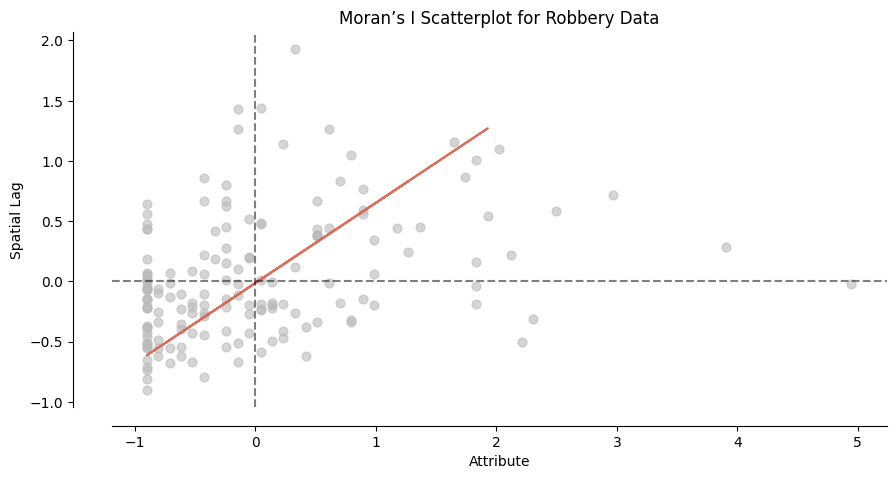

In [ ]:
from esda.moran import Moran
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

# Compute Moran's I for robbery data
mi_robbery = Moran(neighborhood_robberies['robbery_count'], w)

# Output the results
print(f"Moran's I: {mi_robbery.I}")
print(f"Expected Moran's I under CSR (Complete Spatial Randomness): {mi_robbery.EI}")
print(f"p-value: {mi_robbery.p_sim}")

# Visualization
# Moran's Scatterplot for robbery data
fig, ax = plt.subplots(figsize=(10, 10), nrows=1, ncols=1)
moran_scatterplot(mi_robbery, ax=ax)
ax.set_title('Moran’s I Scatterplot for Robbery Data')
plt.show()


In [ ]:
import geopandas as gpd

# Load the GeoJSON file into a GeoDataFrame
gdf_police_station = gpd.read_file("sample_data/Police Facility Locations.geojson")

# Display the first few rows of the GeoDataFrame to verify it's loaded correctly
print(gdf_police_station.head())


   _id  OBJECTID_1      FACILITY             ORGANIZATION  \
0    1           1   11 Division  Toronto Police Services   
1    2           2  12 Division   Toronto Police Services   
2    3           3   13 Division  Toronto Police Services   
3    4           4   14 Division  Toronto Police Services   
4    5           5   22 Division  Toronto Police Services   

                      ADDRESS POSTAL_CODE                         geometry  
0        2054 Davenport Road      M6N 1C8  MULTIPOINT (-79.46083 43.67108)  
1        200 Trethewey Drive      M6M 5E6  MULTIPOINT (-79.48688 43.69458)  
2  1435 Eglinton Avenue West      M6C 3Z4  MULTIPOINT (-79.43668 43.69833)  
3        350 Dovercourt Road      M6J 3E3  MULTIPOINT (-79.42598 43.65131)  
4     3699 Bloor Street West      M9A 1A2  MULTIPOINT (-79.52918 43.64311)  


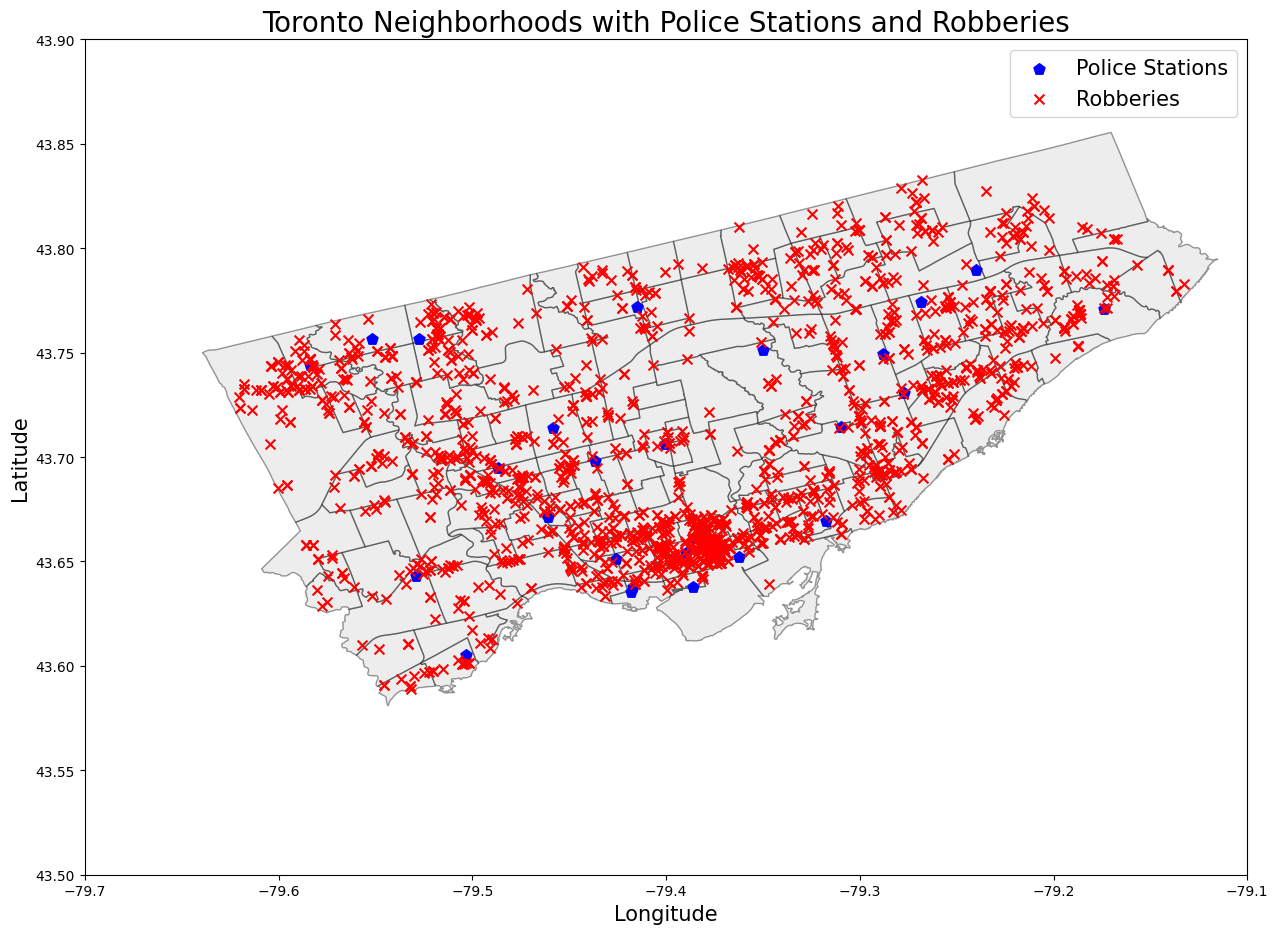

In [ ]:
import matplotlib.pyplot as plt

# Assuming that:
# 'geo_df_neighborhoods' is your GeoDataFrame containing neighborhood geometries.
# 'gdf_police_station' is your GeoDataFrame containing locations of police stations.
# 'robbery_geo_df' is your GeoDataFrame containing locations of robberies.

# Plot the neighborhood map as the base layer
ax = geo_df_neighborhoods.plot(figsize=(15, 15), color='lightgrey', edgecolor='black', alpha=0.4)

# Plot police stations on the neighborhood map
gdf_police_station.plot(ax=ax, marker='p', color='blue', markersize=70, label='Police Stations')

# Plot robbery data on the same map
robbery_geo_df.plot(ax=ax, marker='x', color='red', markersize=50, label='Robberies')

# Set the bounds for the plot to focus on the specified area
ax.set_xlim(-79.7, -79.1)
ax.set_ylim(43.5, 43.9)

# Adding a legend with custom properties and adjusting the plot with labels and title
plt.legend(prop={'size': 15})
plt.title('Toronto Neighborhoods with Police Stations and Robberies', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()


In [ ]:
import geopandas as gpd

# Load the Shootings & Firearm Discharges data from a GeoJSON file located in the 'Data' folder
gdf_shootings = gpd.read_file("sample_data/shootings-firearm-discharges.geojson")

# Display the first few rows of the GeoDataFrame to check its content
print(gdf_shootings.head())


   _id EVENT_UNIQUE_ID    OCC_DATE  OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DOY  \
0    1   GO-2004133803                2004.0   January  Thursday      1.0   
1    2   GO-2004120070  1073-10-06    2004.0   January  Saturday      3.0   
2    3   GO-2004135509                2004.0   January    Sunday      4.0   
3    4   GO-2004126451                2004.0   January    Monday      5.0   
4    5   GO-2004136310                2004.0   January   Tuesday      6.0   

   OCC_DAY  OCC_HOUR OCC_TIME_RANGE DIVISION  DEATH  INJURIES HOOD_158  \
0      1.0       0.0          Night      D31    0.0       1.0       23   
1      3.0       1.0          Night      D54    0.0       0.0      NSA   
2      4.0       4.0          Night      D14    0.0       2.0       78   
3      5.0      13.0      Afternoon      D41    0.0       1.0      124   
4      6.0      19.0        Evening      D42    0.0       0.0      146   

      NEIGHBOURHOOD_158 HOOD_140          NEIGHBOURHOOD_140  \
0  Pelmo Park-Humberlea      

In [ ]:
gdf_shootings.drop(gdf_shootings[gdf_shootings.NEIGHBOURHOOD_140 == "NSA"].index, inplace=True)

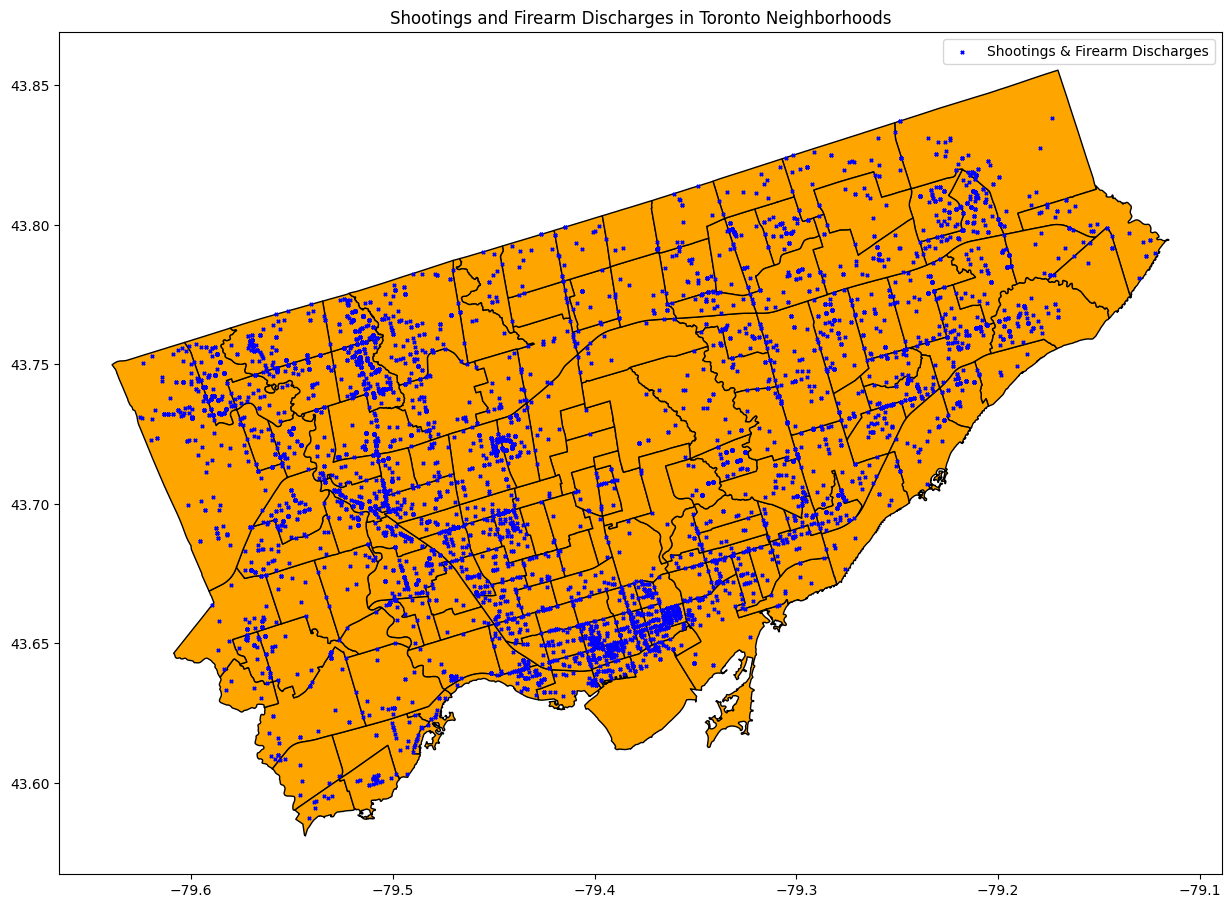

In [ ]:
# Plot the neighborhood map as the base
ax = geo_df_neighborhoods.plot(figsize=(15, 15), color='orange', edgecolor='black')

# Plot shootings and firearm discharges on top of the neighborhood map
gdf_shootings.plot(ax=ax, marker='x', color='blue', markersize=5, label='Shootings & Firearm Discharges')
plt.legend()
plt.title('Shootings and Firearm Discharges in Toronto Neighborhoods')
plt.show()

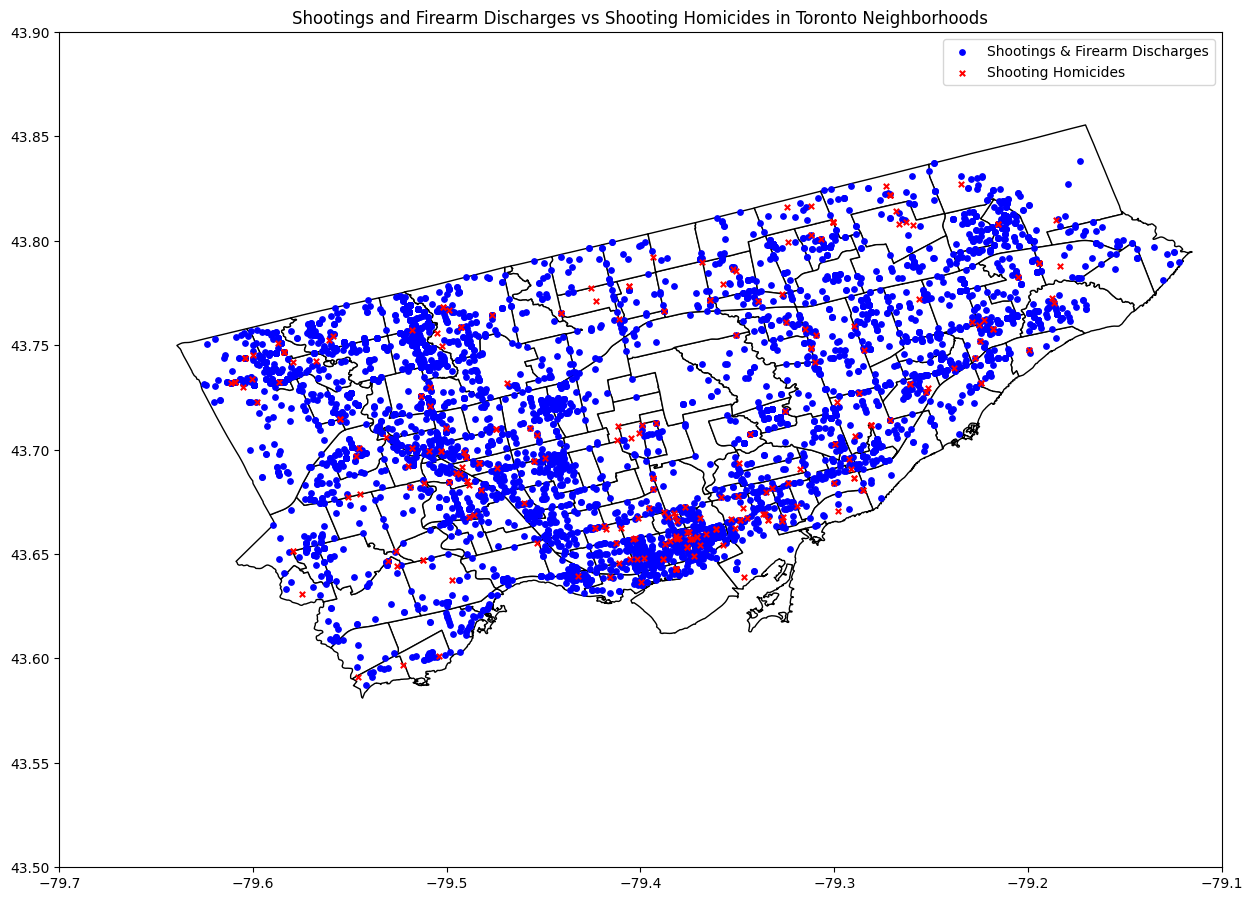

In [ ]:
# Plot the neighborhood map as the base
ax = geo_df_neighborhoods.plot(figsize=(15, 15), color='w', edgecolor='black')

# Plot shootings and firearm discharges on the neighborhood map
gdf_shootings.plot(ax=ax, marker='o', color='b', markersize=15, label='Shootings & Firearm Discharges')

# Plot shooting-related homicides on the same map
weapon_robbery_gdf.plot(ax=ax, marker='x', color='red', markersize=15, label='Shooting Homicides')
ax.set_xlim(-79.7, -79.1)
ax.set_ylim(43.5, 43.9)
# Add legend and title
plt.legend()
plt.title('Shootings and Firearm Discharges vs Shooting Homicides in Toronto Neighborhoods')

# Show the plot
plt.show()